In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-33.85881404923924, -119.90566999516378),
 (76.3650429754691, 125.10215438086846),
 (-46.985436650617736, 172.4886793005142),
 (41.981657235706734, -13.385326581177424),
 (-4.088671738253851, -51.91353496816245),
 (60.490204102776545, -124.91116501436386),
 (49.291943970296416, -119.67318384993474),
 (-18.622042965875593, 137.04716596184676),
 (-27.902060704003944, 18.44023335305522),
 (25.14029665183159, 54.148937188724034),
 (51.41078029991445, 125.74375985047692),
 (52.71197726694285, -85.96557072886927),
 (21.559991917913962, -42.57800243506887),
 (-33.18832099126498, -30.89819140783709),
 (53.24786515307494, 23.37704592526393),
 (86.66570406681618, 63.98306631313426),
 (54.349319798377365, -75.64809716496401),
 (-29.92417929712498, -149.1092315892213),
 (37.98656787037781, 19.508996687121225),
 (-47.45890027027551, 125.97270500594266),
 (24.082900522941586, 6.209791614211042),
 (-21.43884048759304, 15.269047185800048),
 (-14.865681609800703, -57.72951092808694),
 (-71.8306436414

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.85881404923924 -119.90566999516378
76.3650429754691 125.10215438086846
-46.985436650617736 172.4886793005142
41.981657235706734 -13.385326581177424
-4.088671738253851 -51.91353496816245
60.490204102776545 -124.91116501436386
49.291943970296416 -119.67318384993474
-18.622042965875593 137.04716596184676
-27.902060704003944 18.44023335305522
25.14029665183159 54.148937188724034
51.41078029991445 125.74375985047692
52.71197726694285 -85.96557072886927
21.559991917913962 -42.57800243506887
-33.18832099126498 -30.89819140783709
53.24786515307494 23.37704592526393
86.66570406681618 63.98306631313426
54.349319798377365 -75.64809716496401
-29.92417929712498 -149.1092315892213
37.98656787037781 19.508996687121225
-47.45890027027551 125.97270500594266
24.082900522941586 6.209791614211042
-21.43884048759304 15.269047185800048
-14.865681609800703 -57.72951092808694
-71.83064364148574 43.71231788464999
-54.2835850123828 -49.45120366403597
-14.76409866466986 103.55264131275214
39.70186447927355 -

In [5]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    if i >= 100:
        break
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | muros
Processing Record 5 of Set 1 | altamira
Processing Record 6 of Set 1 | fort nelson
Processing Record 7 of Set 1 | oliver
Processing Record 8 of Set 1 | mount isa
Processing Record 9 of Set 1 | karasburg
Processing Record 10 of Set 1 | abu dhabi
Processing Record 11 of Set 1 | tahe
Processing Record 12 of Set 1 | longlac
City not found. Skipping...
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | sokolka
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | chapais
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | lixourion
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | gat
Processing Record 22 of Set 1 | usako

In [9]:
len(city_data)

91

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.42,81,10,19.15,PF,2022-12-07 02:33:49
1,Tiksi,71.6872,128.8694,-29.42,100,100,2.48,RU,2022-12-07 02:33:49
2,Dunedin,-45.8742,170.5036,48.79,66,92,1.99,NZ,2022-12-07 02:30:06
3,Muros,42.7762,-9.0603,48.69,95,100,4.59,ES,2022-12-07 02:33:50
4,Altamira,-3.2033,-52.2064,75.13,87,52,2.08,BR,2022-12-07 02:33:50
5,Fort Nelson,58.8053,-122.7002,-18.81,76,100,3.44,CA,2022-12-07 02:30:51
6,Oliver,49.1831,-119.5524,25.05,74,54,5.75,CA,2022-12-07 02:33:50
7,Mount Isa,-20.7333,139.5000,101.97,18,0,9.22,AU,2022-12-07 02:33:51
8,Karasburg,-28.0167,18.7500,57.65,51,6,6.11,NA,2022-12-07 02:33:51
9,Abu Dhabi,24.4667,54.3667,71.62,85,0,3.44,AE,2022-12-07 02:33:52


In [11]:
new_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-12-07 02:33:49,-23.1203,-134.9692,75.42,81,10,19.15
1,Tiksi,RU,2022-12-07 02:33:49,71.6872,128.8694,-29.42,100,100,2.48
2,Dunedin,NZ,2022-12-07 02:30:06,-45.8742,170.5036,48.79,66,92,1.99
3,Muros,ES,2022-12-07 02:33:50,42.7762,-9.0603,48.69,95,100,4.59
4,Altamira,BR,2022-12-07 02:33:50,-3.2033,-52.2064,75.13,87,52,2.08
...,...,...,...,...,...,...,...,...,...
86,Nanakuli,US,2022-12-07 02:34:00,21.3906,-158.1547,82.35,66,0,11.50
87,Brae,GB,2022-12-07 02:35:26,60.3964,-1.3530,37.02,66,100,24.67
88,Souillac,MU,2022-12-07 02:35:26,-20.5167,57.5167,73.78,94,75,3.44
89,Tasiilaq,GL,2022-12-07 02:31:30,65.6145,-37.6368,33.96,71,6,9.04


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
time.strftime("%x")

'12/06/22'

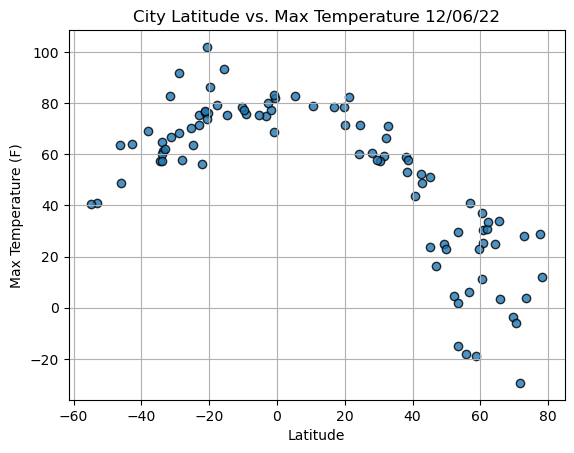

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

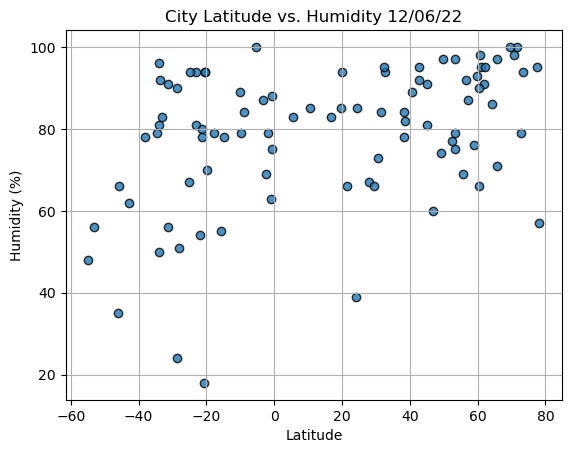

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

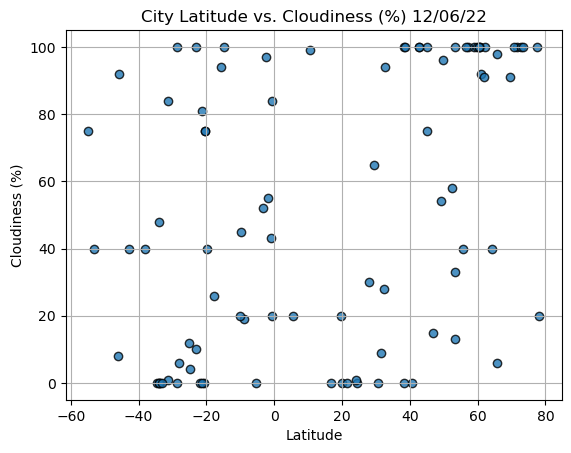

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

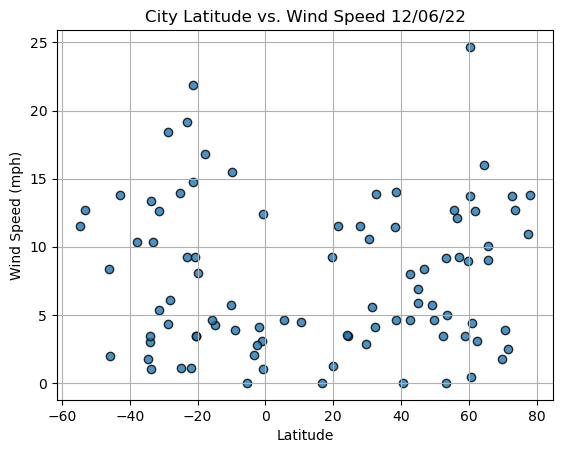

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
from scipy.stats import linregress

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Sokolka
Country                        PL
Date          2022-12-07 02:33:53
Lat                       53.4072
Lng                       23.5023
Max Temp                    29.68
Humidity                       97
Cloudiness                    100
Wind Speed                   9.17
Name: 13, dtype: object

In [22]:
# Northern Hemi identification
city_data_df['Lat'] >= 0

0     False
1      True
2     False
3      True
4     False
      ...  
86     True
87     True
88    False
89     True
90     True
Name: Lat, Length: 91, dtype: bool

In [23]:
# DataFrame as the same above
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tiksi,RU,2022-12-07 02:33:49,71.6872,128.8694,-29.42,100,100,2.48
3,Muros,ES,2022-12-07 02:33:50,42.7762,-9.0603,48.69,95,100,4.59
5,Fort Nelson,CA,2022-12-07 02:30:51,58.8053,-122.7002,-18.81,76,100,3.44
6,Oliver,CA,2022-12-07 02:33:50,49.1831,-119.5524,25.05,74,54,5.75
9,Abu Dhabi,AE,2022-12-07 02:33:52,24.4667,54.3667,71.62,85,0,3.44


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

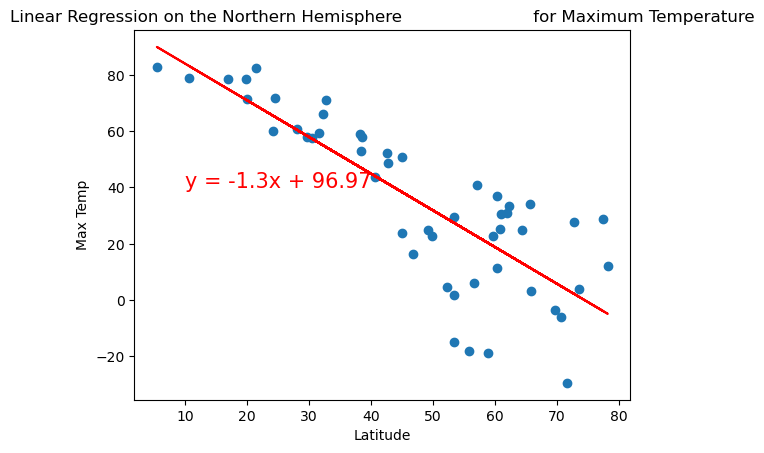

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

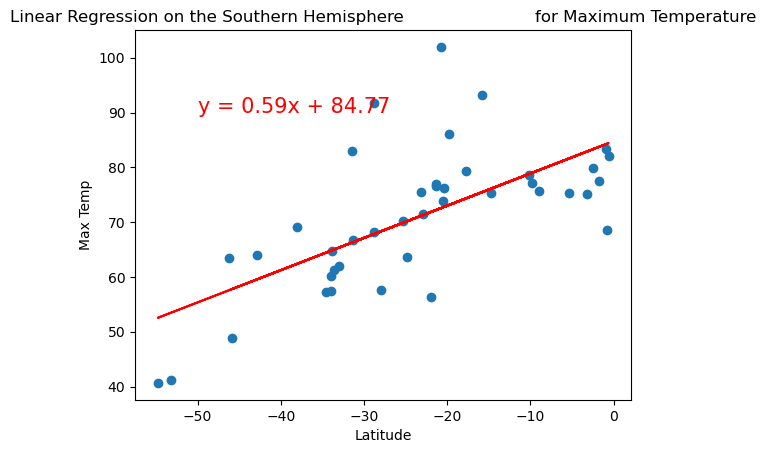

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

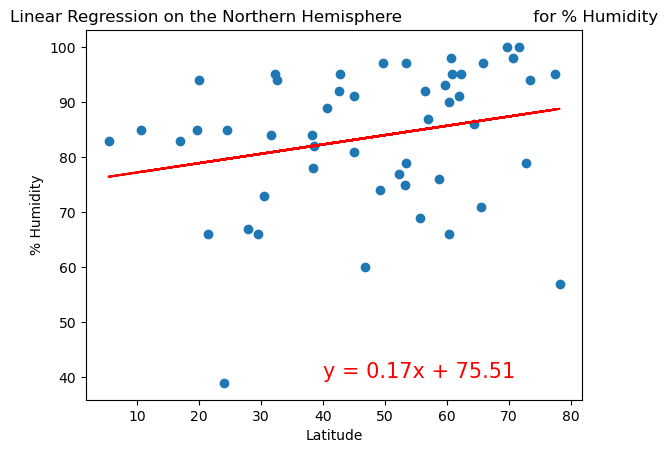

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,40))

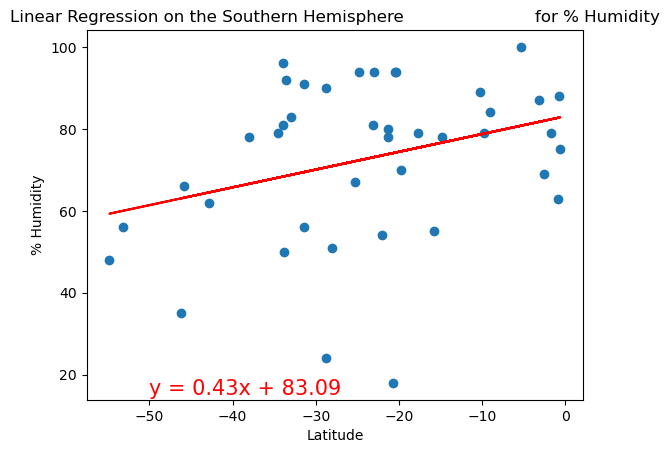

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

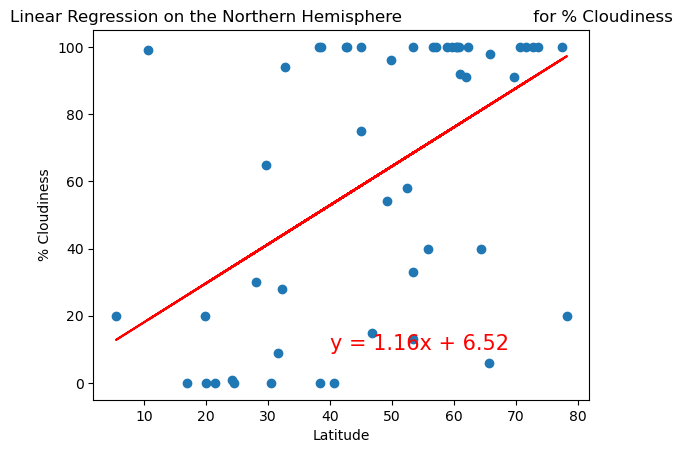

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

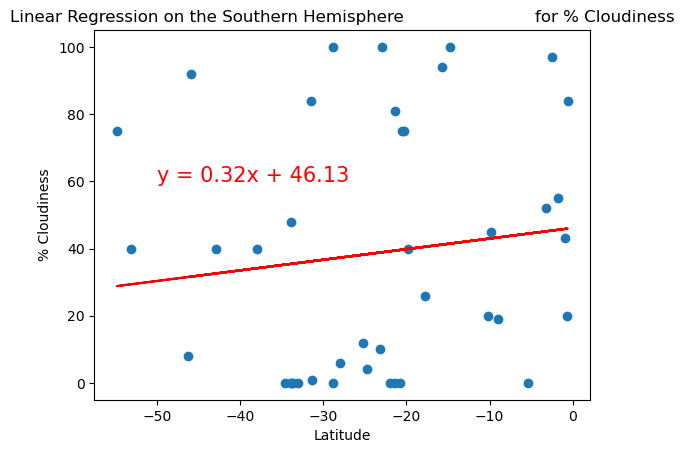

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

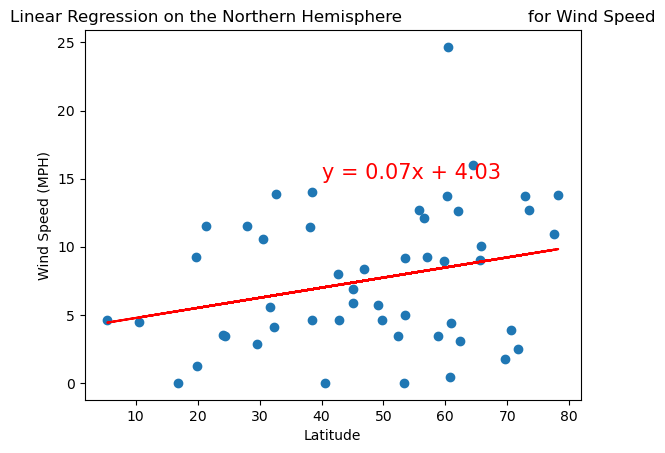

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed (MPH)',(40,15))

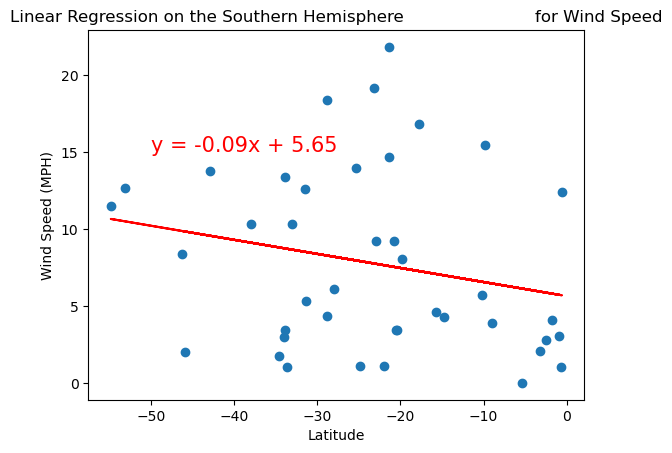

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (MPH)',(-50,15))